In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This file includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

The period from June 2012 to September 2012.

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[247 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
## data cleaning
df[df.isnull().any(axis=1)]


day month  year Temperature   RH   Ws Rain   \
122                            NaN   NaN   NaN         NaN  NaN  NaN   NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
168                             14     7  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
123   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

there is two region bejaia region dataset and sidi-bel region dataset 
so we add new column with region

In [5]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [7]:
df['Region']=df['Region'].astype(int)

In [8]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122                            NaN   NaN   NaN         NaN  NaN  NaN   NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
168                             14     7  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    Region  
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN       1  
123   NaN   NaN     NaN   NaN   NaN      NaN       NaN       1  
168  88.9  12.9  14.6 9  12.5  10.4  fire          NaN       1

In [9]:
## dropoing the null values 
df=df.dropna().reset_index(drop=True)

In [10]:
df.iloc[[122]]

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
122  FWI  Classes         1

In [11]:
## removing the 122 row
df=df.drop(122).reset_index(drop=True)

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
## removing the extra space for column name
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
## change the required column as int dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [15]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [17]:
## changing the other column to float dtype
object=[features for features in df.columns if df[features].dtype=='O']


In [18]:
for i in object:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [20]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0

In [21]:
## save the cleaned dataset 
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv",index=False)

## exploratory data analysis

In [22]:
df_copy=df.drop(['day','month','year'],axis=True)

In [23]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire      
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire      
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire      
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire      
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire      

   Region  
0       0  
1       0  
2       0  
3       0  
4       0

In [24]:
df_copy['Classes']=df_copy['Classes'].str.strip()

In [25]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [26]:
df_copy['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [28]:
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)


In [30]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [36]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

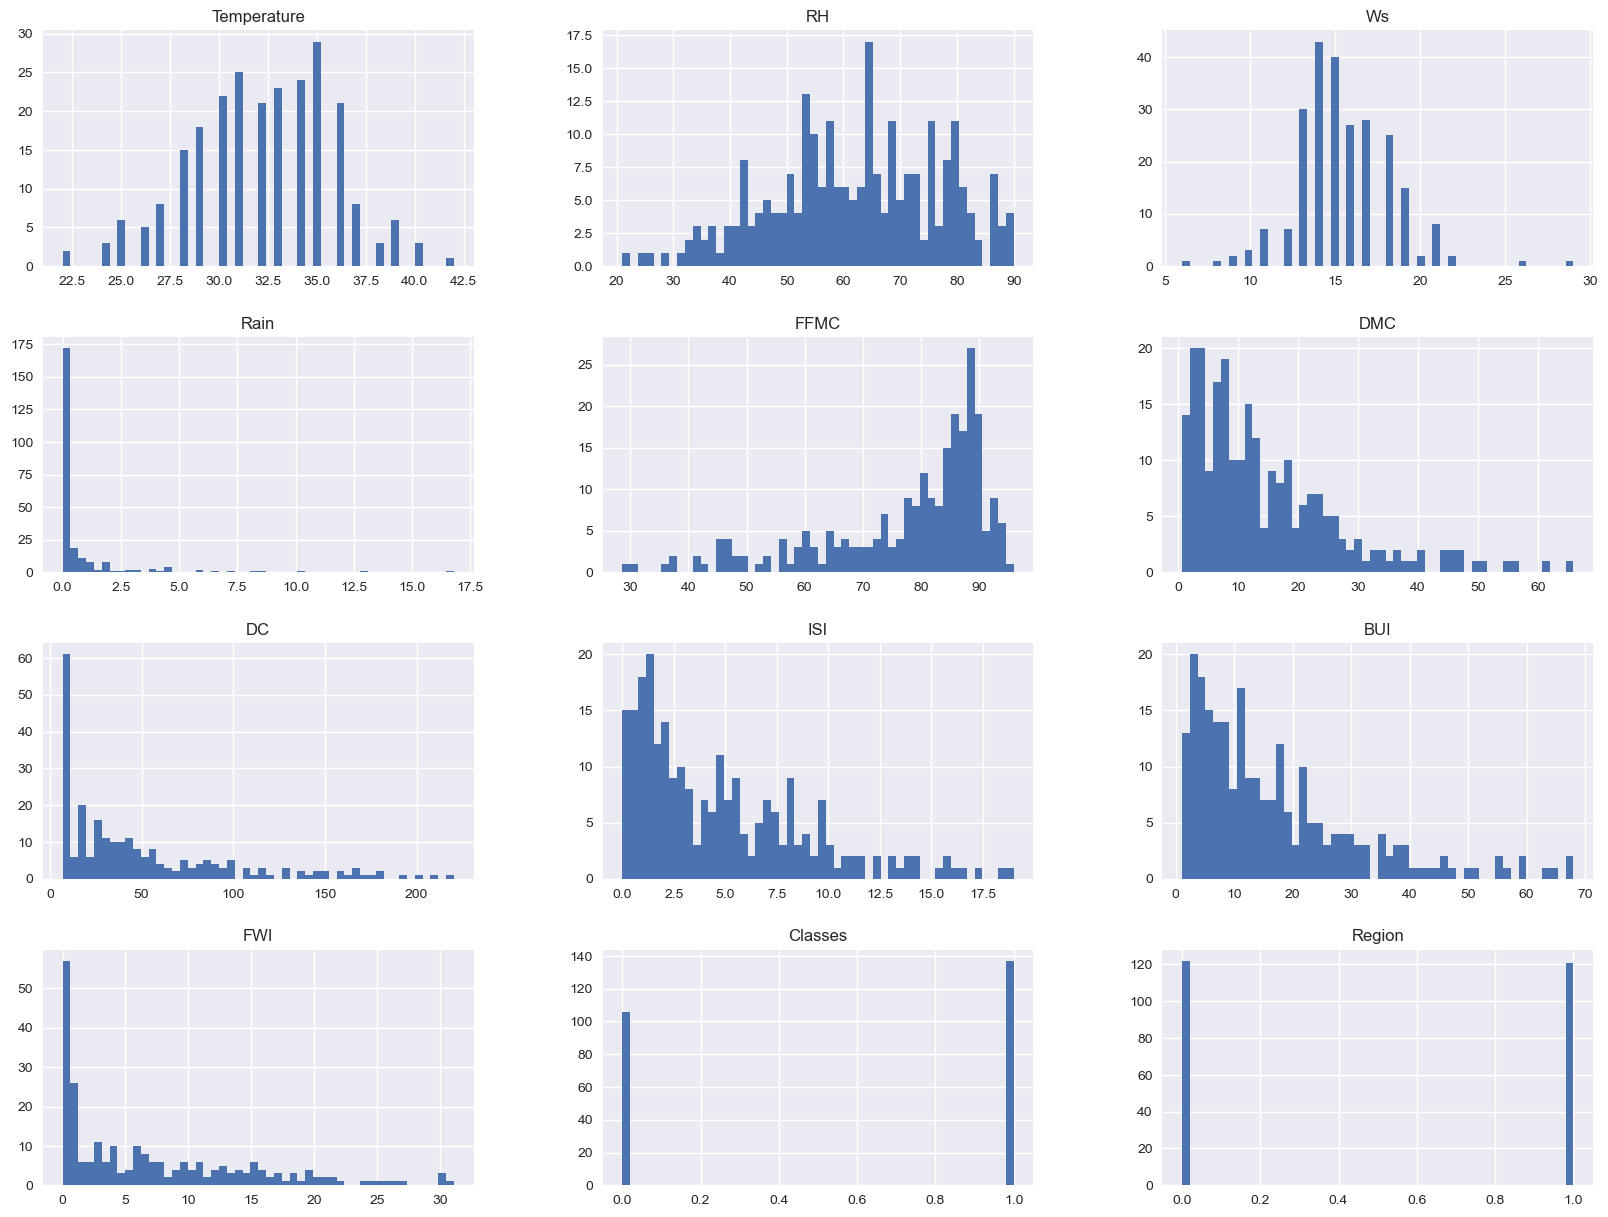

In [37]:
## visualizations

plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))

In [41]:
## percentage for pie chart
df_copy['Classes'].value_counts(normalize=True)*100

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

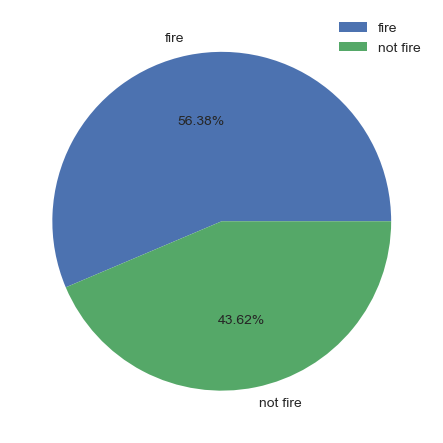

In [44]:
plt.pie(x=df_copy['Classes'].value_counts(normalize=True).values*100,labels=['fire','not fire'],autopct='%1.2f%%')
plt.legend()

## correlation 

In [45]:
df_copy.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
FWI             0.566670 -0.580957  0.032368 -0.324422  0.691132  0.875864   
Classes         0.516015 -0.432161 -0.069964 -0.379097  0.769492  0.585658   
Region          0.269555 -0.402682 -0.181160 -0.040013  0.222241  0.192089   

                   DC       ISI       BUI       FWI   Classes    Region  
Temperature  0.376284  0.603871  0.459789  0.566670  0.516015  0.269555  
RH          -0.226941 -0.686667 -0.353841 -0.580957 -0.432161 -0.402682  
Ws           0.079135  0.008532  0.031438  0.032368 -0.069964 -0.181160  
Rain        -0.298023 -0.347484 -0.299852 -0.324422 -0.379097 -0.040013  
FFMC         0.507397  0.740007  0.592011  0.691132  0.769492  0.222241  
DMC          0.875925  0.680454  0.982248  0.875864  0.585658  0.192089  
DC           1.000000  0.508643  0.941988  0.739521  0.511123 -0.078734  
ISI          0.508643  1.000000  0.644093  0.922895  0.735197  0.263197  
BUI          0.941988  0.644093  1.000000  0.857973  0.586639  0.089408  
FWI          0.739521  0.922895  0.857973  1.000000  0.719216  0.197102  
Classes      0.511123  0.735197  0.586639  0.719216  1.000000  0.162347  
Region      -0.078734  0.263197  0.089408  0.197102  0.162347  1.000000

<Axes: >

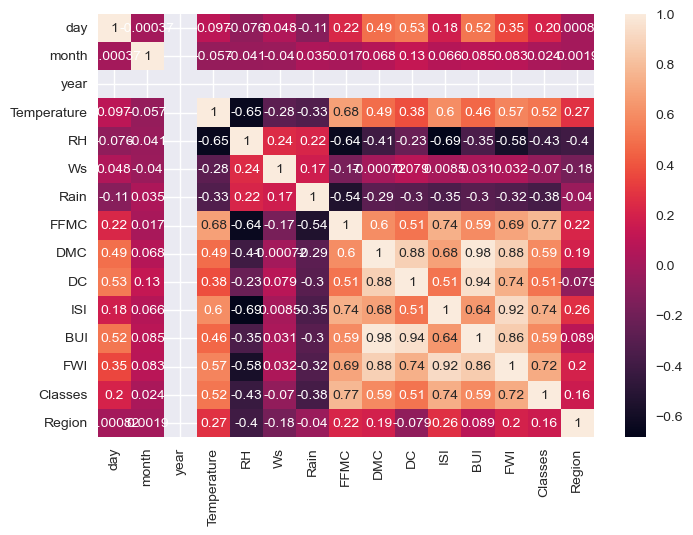

In [46]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

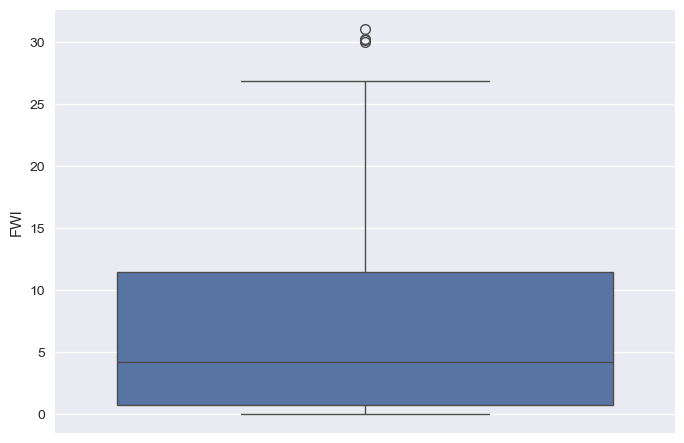

In [49]:
## box plots
sns.boxplot(df_copy['FWI'])
plt.axes()

Text(0.5, 1.0, 'fire analysis of bejaia region ')

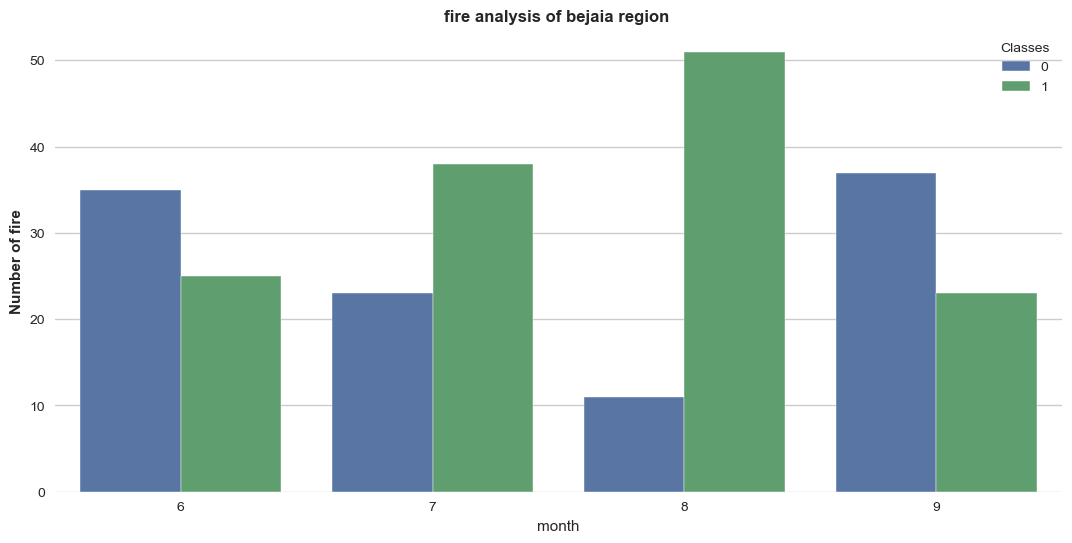

In [57]:
## monthly fire analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of fire",weight='bold')
plt.title("fire analysis of sidi-bel region ",weight='bold')

Text(0.5, 1.0, 'fire analysis of brjaia region ')

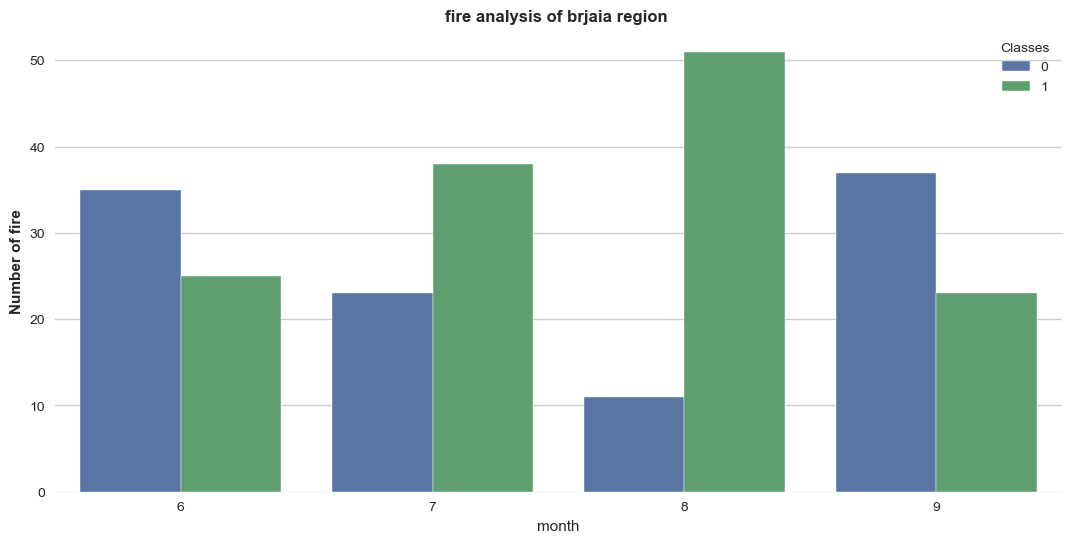

In [58]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of fire",weight='bold')
plt.title("fire analysis of brjaia region ",weight='bold')